In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
auto_df=pd.read_csv("train-set.csv")

In [3]:
auto_df.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


In [4]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      8068 non-null   int64  
 1   Gender          8068 non-null   object 
 2   Married         7928 non-null   object 
 3   Age             8068 non-null   int64  
 4   Graduated       7990 non-null   object 
 5   Profession      7944 non-null   object 
 6   WorkExperience  7239 non-null   float64
 7   SpendingScore   8068 non-null   object 
 8   FamilySize      7733 non-null   float64
 9   Category        7992 non-null   object 
 10  Segmentation    8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
auto_df.isnull().sum()

CustomerID          0
Gender              0
Married           140
Age                 0
Graduated          78
Profession        124
WorkExperience    829
SpendingScore       0
FamilySize        335
Category           76
Segmentation        0
dtype: int64

In [6]:
auto_df.shape

(8068, 11)

In [7]:
auto_df=auto_df.drop("CustomerID",axis=1)

In [8]:
for v in auto_df.columns:
    print(auto_df[v].value_counts())
    print(auto_df[v].nunique())
    print("=============================================")
    

Male      4417
Female    3651
Name: Gender, dtype: int64
2
Yes    4643
No     3285
Name: Married, dtype: int64
2
35    250
37    234
33    232
42    232
40    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: Age, Length: 67, dtype: int64
67
Yes    4968
No     3022
Name: Graduated, dtype: int64
2
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64
9
1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: WorkExperience, dtype: int64
15
Low        4878
Average    1974
High       1216
Name: SpendingScore, dtype: int64
3
2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: FamilySize, dtype: i

In [9]:
# Treating the null values

In [10]:
auto_df.isnull().sum()

Gender              0
Married           140
Age                 0
Graduated          78
Profession        124
WorkExperience    829
SpendingScore       0
FamilySize        335
Category           76
Segmentation        0
dtype: int64

In [11]:
for dt in auto_df.columns:
    if auto_df[dt].dtypes=="object":
        auto_df[dt]=auto_df[dt].fillna(auto_df[dt].mode()[0])
    else:
        auto_df[dt]=auto_df[dt].fillna(auto_df[dt].mean())

In [12]:
auto_df.isnull().sum()

Gender            0
Married           0
Age               0
Graduated         0
Profession        0
WorkExperience    0
SpendingScore     0
FamilySize        0
Category          0
Segmentation      0
dtype: int64

In [13]:
# Checking the outkiers in the data

In [14]:
# Converting the categorical values into numerical Values

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
for cat in auto_df.columns:
    if auto_df[cat].dtypes=="object":
        auto_df[cat]=le.fit_transform(auto_df[cat])

In [18]:
auto_df.dtypes

Gender              int32
Married             int32
Age                 int64
Graduated           int32
Profession          int32
WorkExperience    float64
SpendingScore       int32
FamilySize        float64
Category            int32
Segmentation        int32
dtype: object

In [19]:
auto_df.head(4)

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,1,0,22,0,5,1.000000,2,4.0,3,3
1,0,1,38,1,2,2.641663,0,3.0,3,0
2,0,1,67,1,2,1.000000,2,1.0,5,1
3,1,1,67,1,7,0.000000,1,2.0,5,1


In [20]:
# Checking the outliers in the data

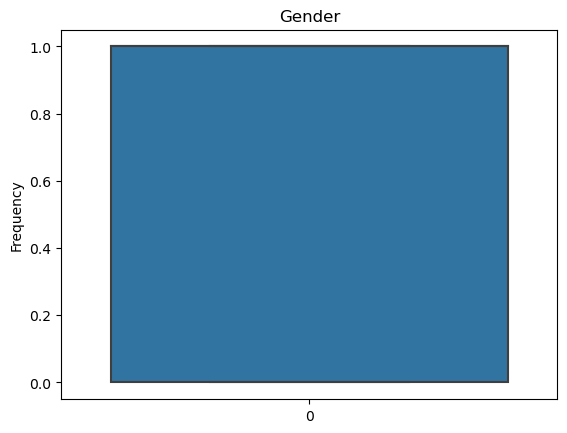

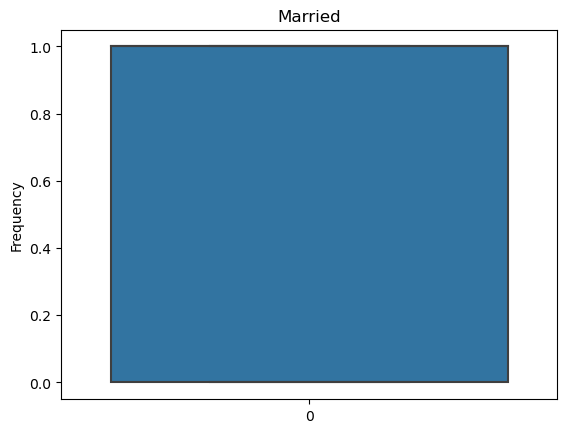

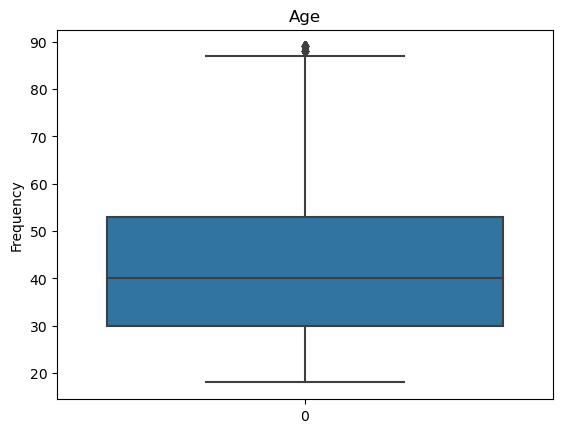

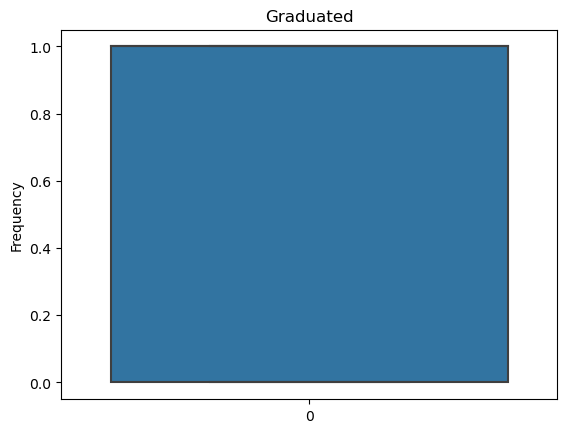

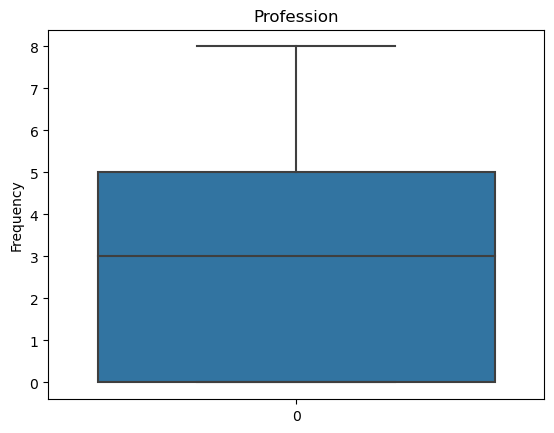

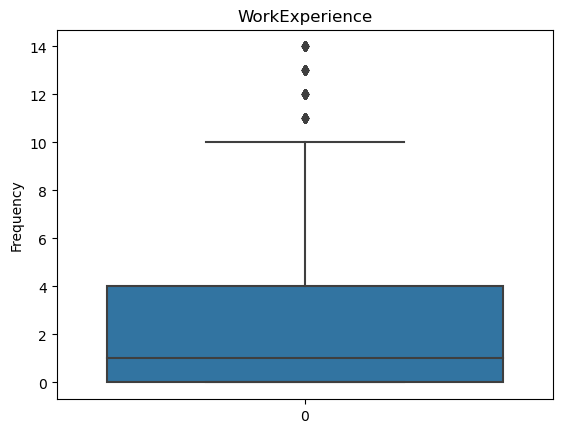

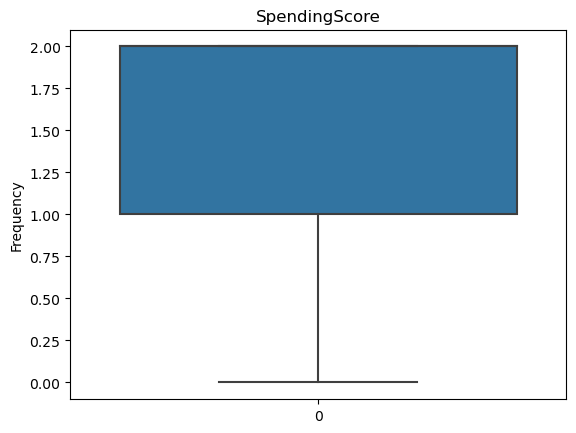

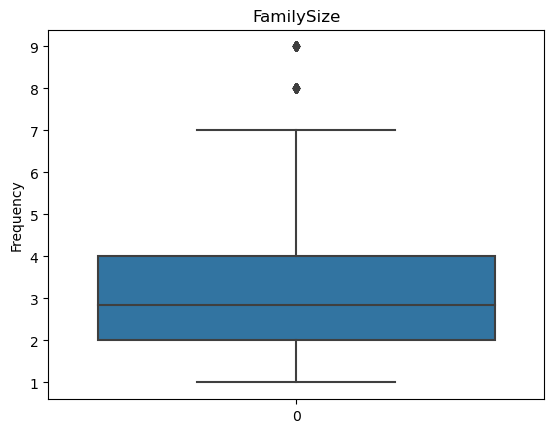

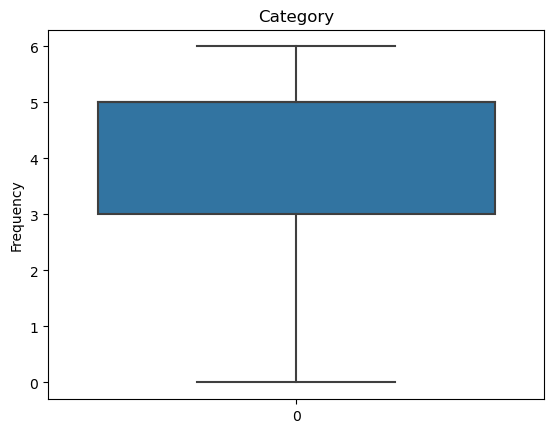

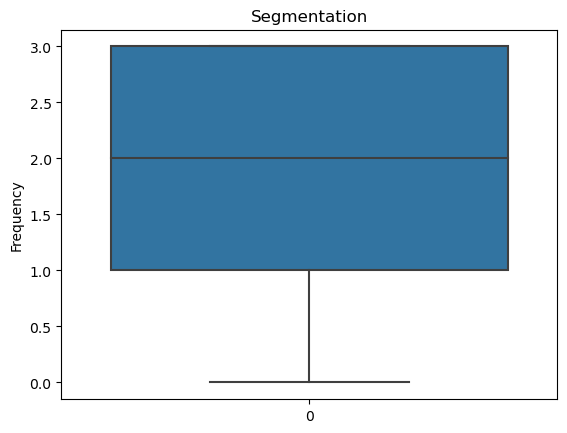

In [21]:
for box in auto_df.columns:
    sns.boxplot(data=auto_df[box])
    plt.title(f"{box}")
    plt.ylabel("Frequency")
    plt.show()

In [22]:
# Removing the outliers from the data

In [23]:
for out in auto_df.columns:
    q1=np.percentile(auto_df[out],25)
    q3=np.percentile(auto_df[out],75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ob=q3+1.5*iqr
    df_auto=auto_df[(auto_df[out]>=lb)&(auto_df[out]<=ob)]

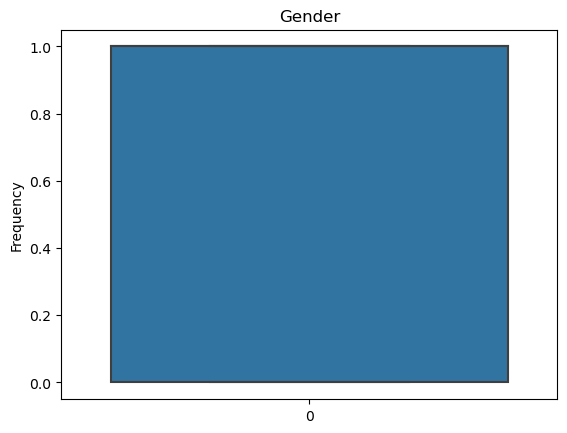

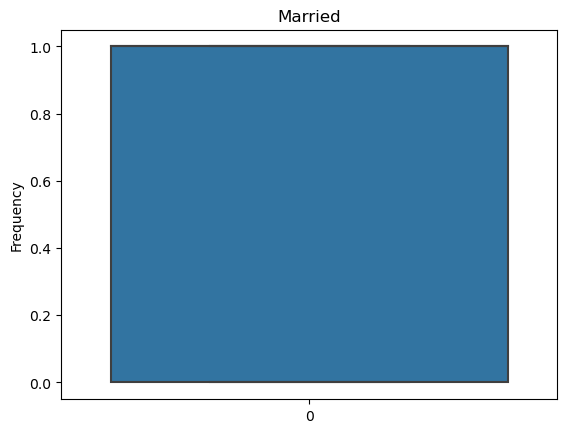

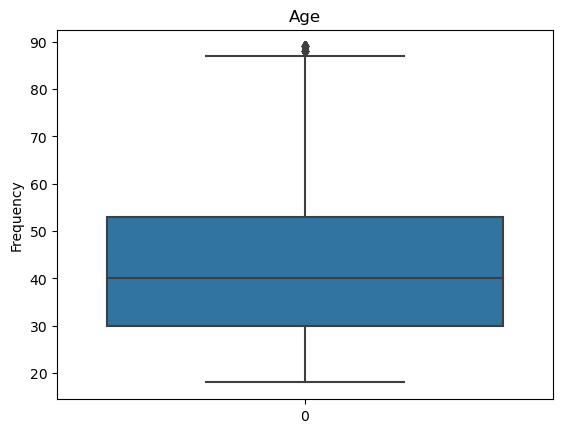

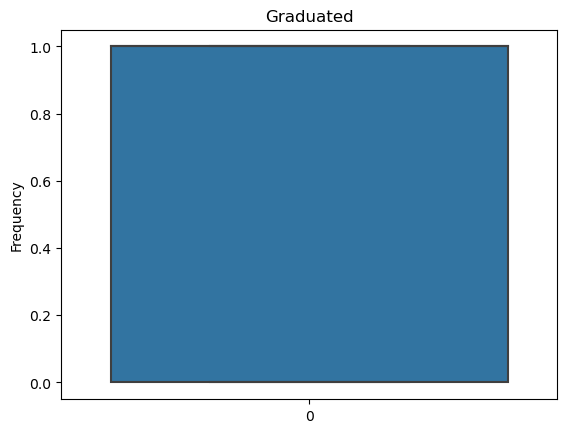

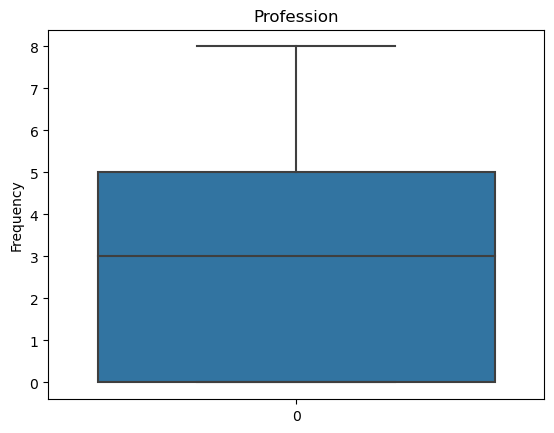

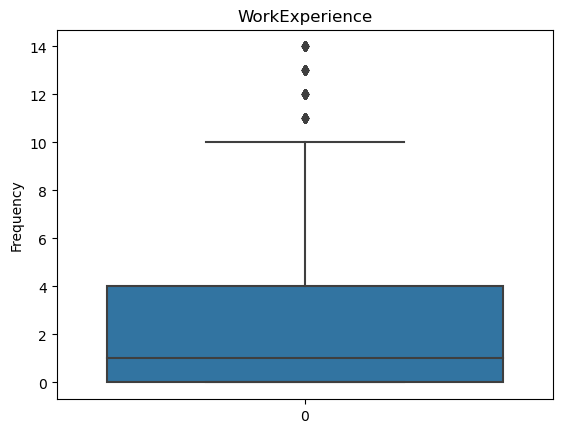

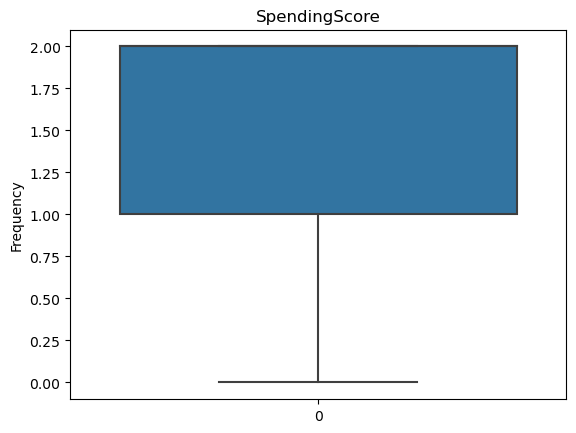

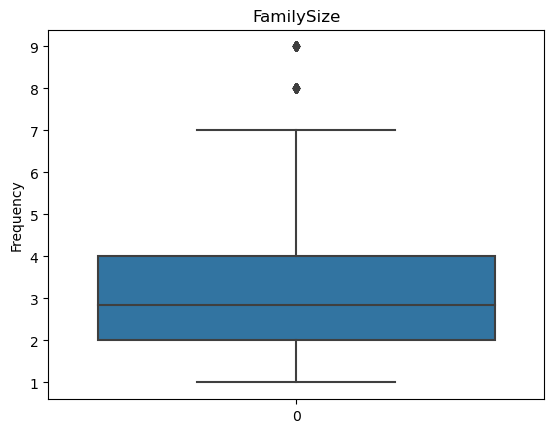

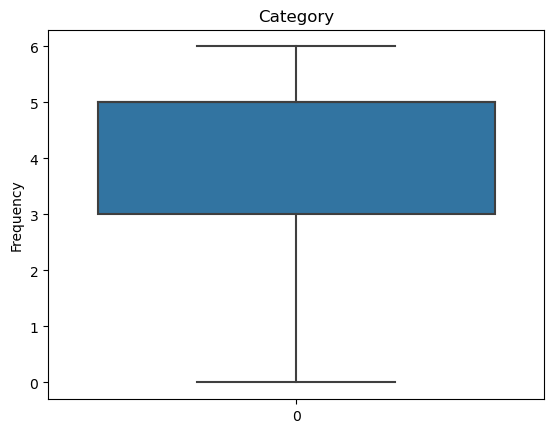

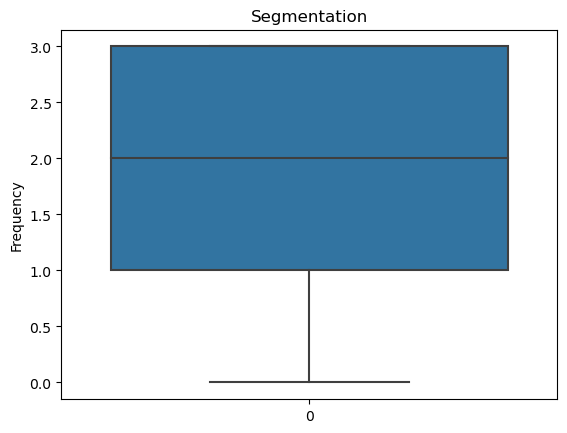

In [24]:
for box in df_auto.columns:
    sns.boxplot(data=df_auto[box])
    plt.title(f"{box}")
    plt.ylabel("Frequency")
    plt.show()

In [25]:
# Plotting the graphs

In [26]:
import warnings
warnings.filterwarnings("ignore")

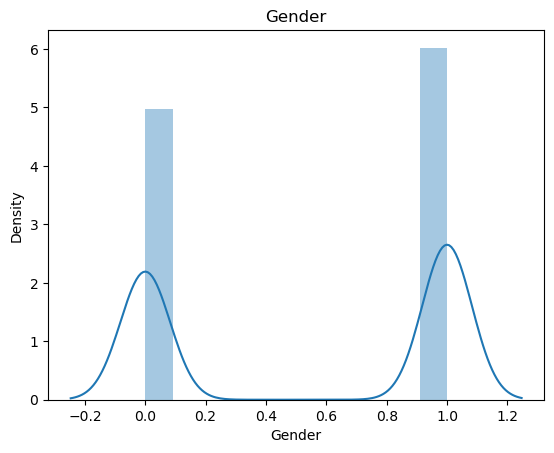

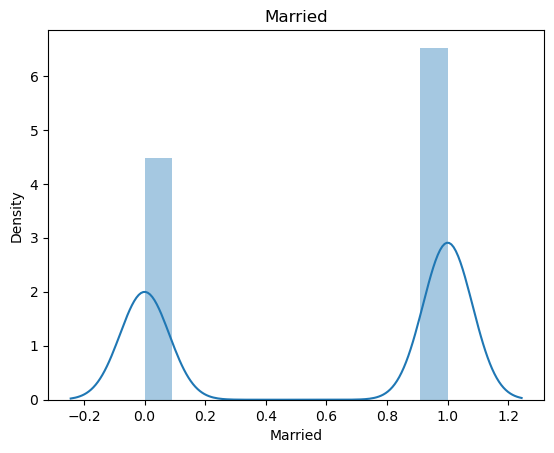

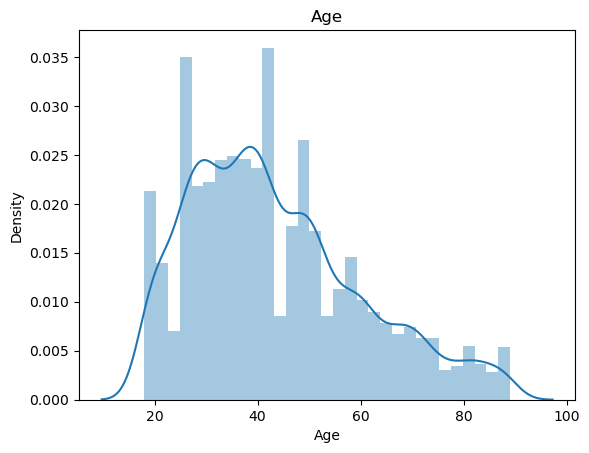

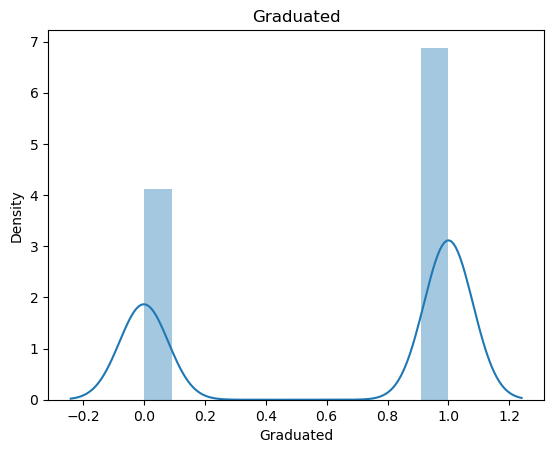

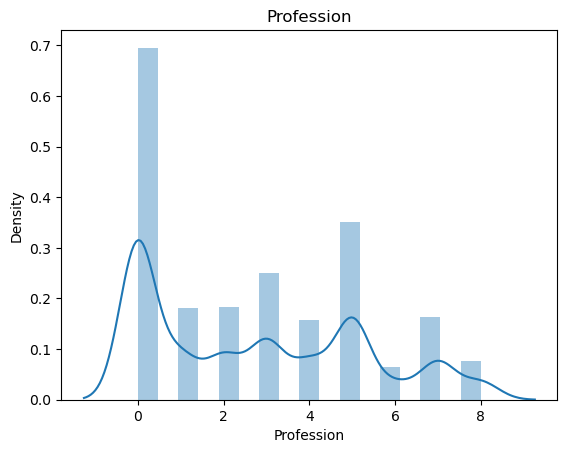

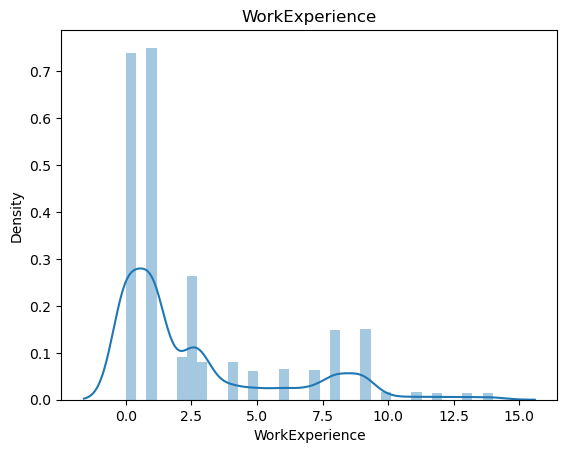

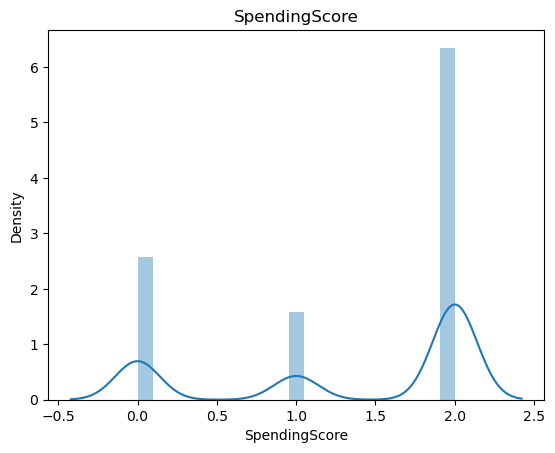

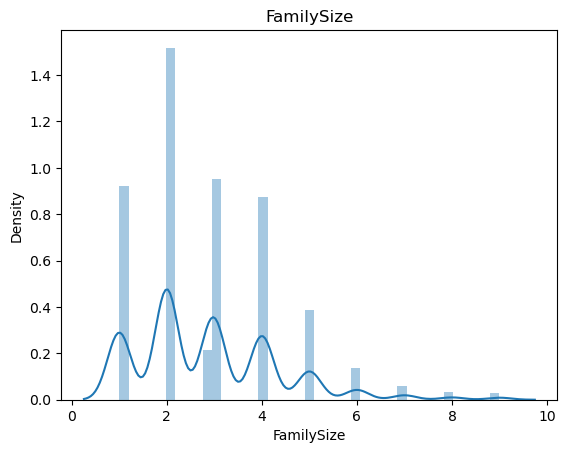

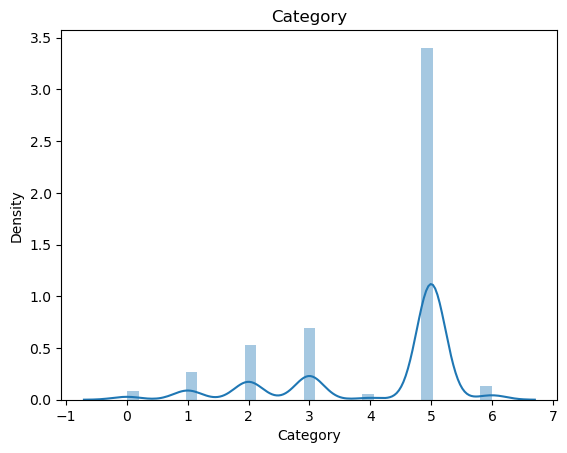

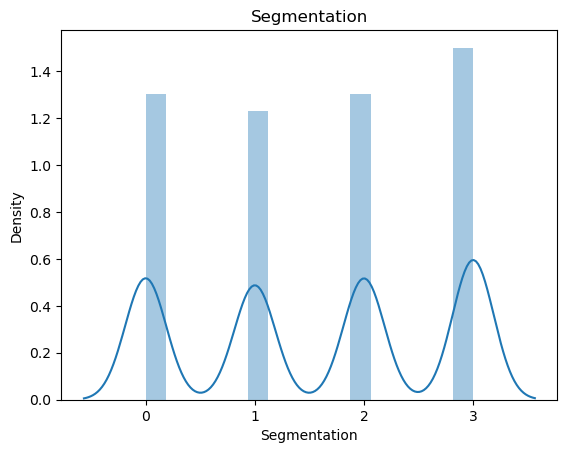

In [27]:
for h in df_auto.columns:
    #df_auto.drop("Gender",axis=1)
    sns.distplot(df_auto[h])
    plt.title(f"{h}")
    plt.show()

In [28]:
df_auto["Gender"].dtype

dtype('int32')

In [29]:
corr=df_auto.corr()

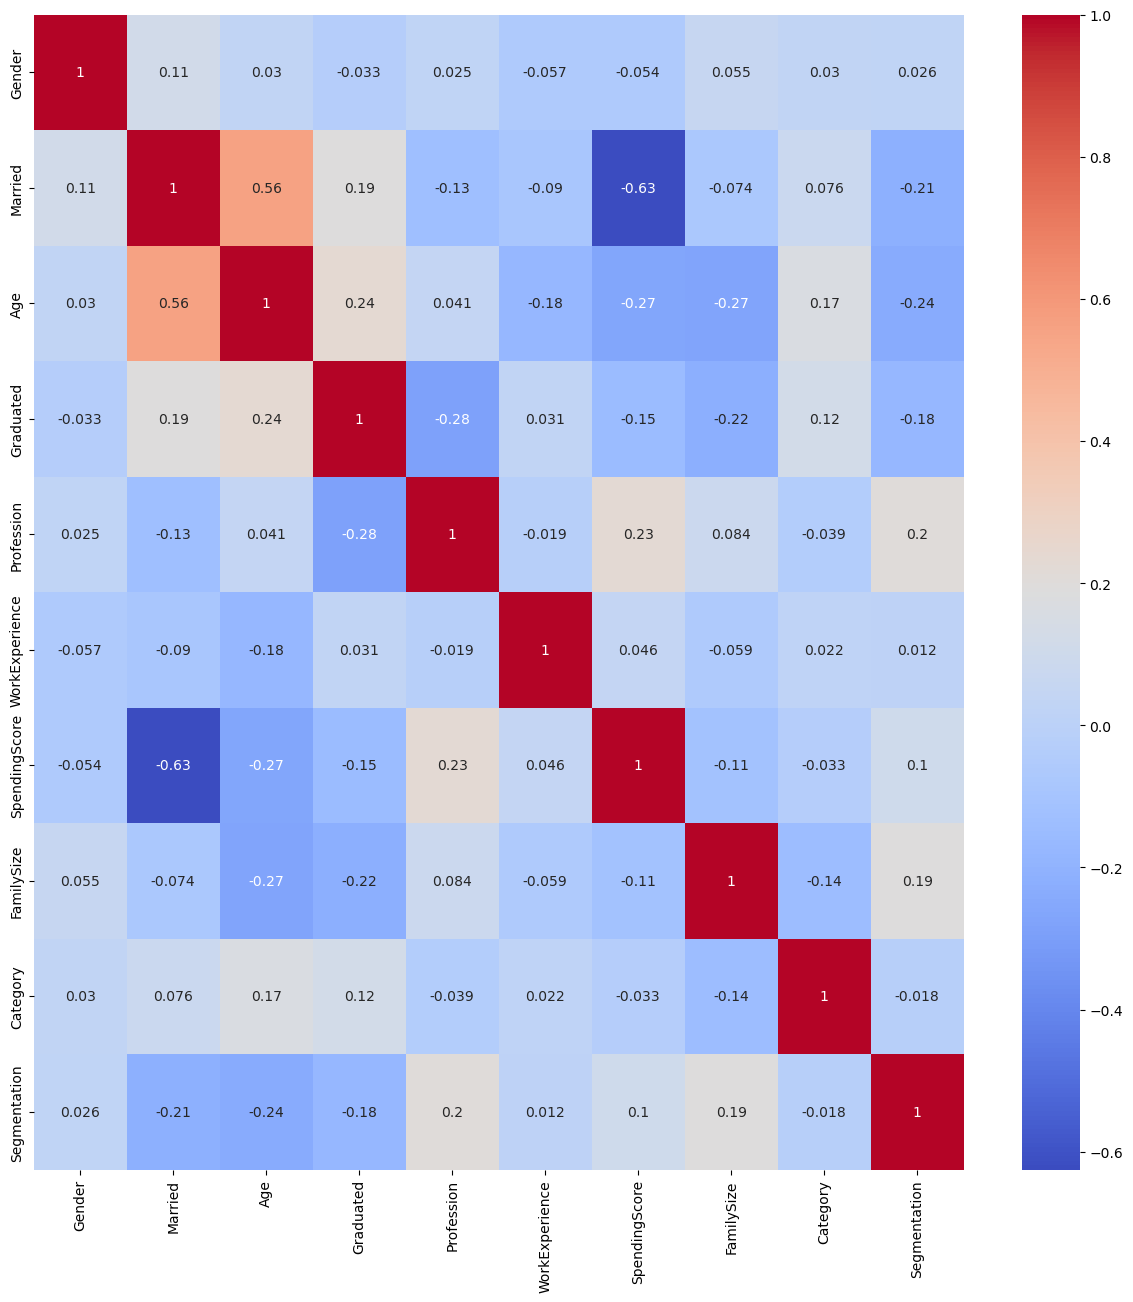

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap="coolwarm",annot=True)
plt.show()

In [31]:
# All the features are independent to each other therefore no feature reduction is required

In [32]:
from sklearn.cluster import KMeans

In [33]:
# Drawing an elbow graph to find out clusters

In [34]:
x=df_auto.drop("Segmentation",axis=1)

In [35]:
clusters=[]

for i in range(1,15):
    knm=KMeans(n_clusters=i)
    knm.fit(x)
    clusters.append(knm.inertia_)

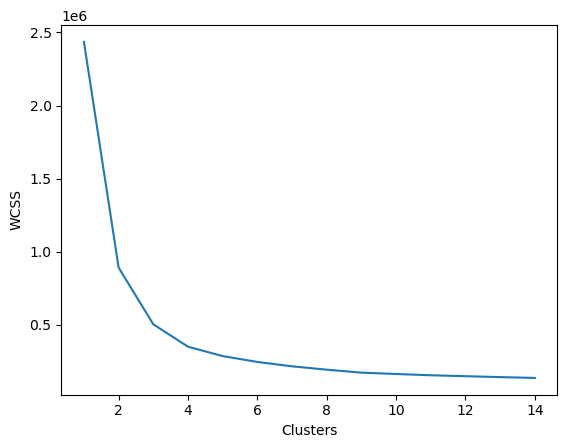

In [37]:
sns.lineplot(x=list(range(1,15)),y=clusters)
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# From the above graph optimal clusters is 4

In [38]:
knmm=KMeans(n_clusters=4)
knmm.fit(x)

KMeans(n_clusters=4)

In [39]:
x["Cluster"]=knmm.labels_

In [40]:
x.head(3)

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Cluster
0,1,0,22,0,5,1.000000,2,4.0,3,2
1,0,1,38,1,2,2.641663,0,3.0,3,0
2,0,1,67,1,2,1.000000,2,1.0,5,1


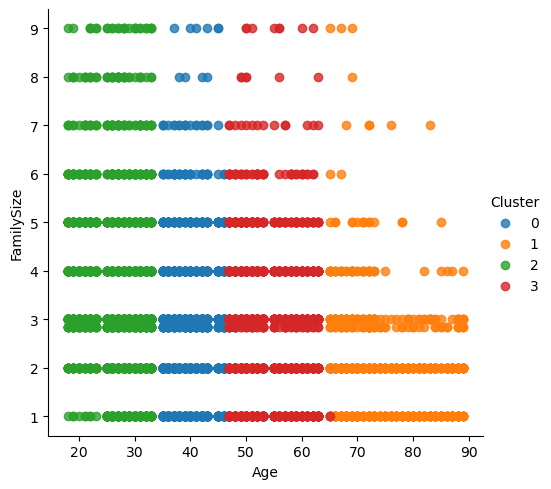

In [50]:
sns.lmplot("Age","FamilySize",data=x,hue="Cluster",fit_reg=False)
